In [1]:
import sys
sys.path.append('../../../scripts/')

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import integrate
from scipy.special import comb, perm
from IPython import display
from tqdm import tqdm
from ternary.helpers import simplex_iterator
import ternary

from mh_simulation import *
from mh_theory import *

In [2]:
display.set_matplotlib_formats('svg')

### Figure 5A, symmetric readout error

In [3]:
N = 100
M = 100
Nc = 1000
P = 20
K = 20
delta_sigma = 0.3
delta_eta = 0.3
f= 0.05

In [4]:
n = 10  # grid size
Record_1= dict()


for i,j,k in tqdm(simplex_iterator(n),total = comb(n+2,n)):
    
    p1 = i / float(n)
    p2 = j / float(n)
    p3 = k / float(n)
    
    Record_1[(i,j,k)] = Readerror_theory(Nc,N,M,P,K,p1,p2,p3,f,delta_sigma,delta_eta)[0]

100%|██████████| 66/66.0 [00:09<00:00,  7.33it/s]


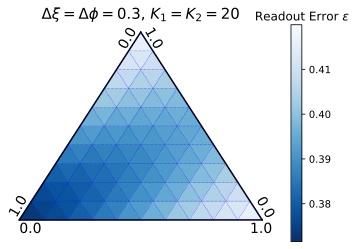

In [5]:
figure, tax = ternary.figure(scale=n)
tax.heatmap(Record_1,scale=n,cmap='Blues_r')
tax.boundary()

tax.gridlines(multiple = 1, color="blue")

plt.text(0,-0.6,'0.0',fontsize=14)
plt.text(9.5,-0.6,'1.0',fontsize=14)

plt.text(9.65,0.1,'0.0',rotation=-60,fontsize=14)
plt.text(5.05,7.9,'1.0',rotation = -60,fontsize=14)

plt.text(4.0,7.9,'0.0',rotation= 60,fontsize=14)
plt.text(-0.5,0.15,'1.0',rotation = 60,fontsize=14)


plt.text(9.7,9.2,r'Readout Error $\epsilon$',fontsize=12)

# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

tax.set_title(r'$\Delta \xi= \Delta \phi = 0.3$, $K_1 = K_2 = 20$',y=1, fontsize=15)
plt.savefig('5A.png',transparent=True,dpi=200,bbox_inches='tight')
plt.show()

In [6]:
# Optimal point
from scipy.optimize import minimize

N = 100
M = 100
Nc = 1000
P = 20
K = 20
delta_sigma = 0.3
delta_eta = 0.3
f= 0.05
T = norm.ppf(1-f) 

e = 1e-10 # close to zero
cons = ({'type': 'eq', 'fun': lambda x: x[0] + x[1] + x[2] - 1}, # x+y+z=1
        {'type': 'ineq', 'fun': lambda x: x[0] - e}, # x>=e, s.t. x > 0
        {'type': 'ineq', 'fun': lambda x: x[1] - e},
        {'type': 'ineq', 'fun': lambda x: x[2] - e}
       )
p0 = np.array((0.4, 0.6, 0.0)) # initial value

sig_coeff = signal_coeff(f, T, delta_sigma, delta_eta)
C0, A, B, C = part3_coeff(Nc,N,M,P,K,f,T,delta_sigma,delta_eta)
D, E, F, R, S = part4_coeff(Nc,N,M,P,K,f,T,delta_sigma,delta_eta)

def minus_SNR_p(p):    
    p1, p2, p3 = p
    signal  = f**2 * (1-f)**2 * ( sig_coeff[0]*(p1**2) + sig_coeff[1]*(p2**2) + sig_coeff[2]*(p3**2) + 
                                sig_coeff[3]*p1*p2 + sig_coeff[4]*p1*p3 + sig_coeff[5]*p2*p3 
                                + sig_coeff[6]*p1 + sig_coeff[7]*p2 + sig_coeff[8]*p3 + 1)
    part3 = C0 + A*p1 + B*p2 + C*p3
    part4 = D*p1*p1 + E*p2*p2 + F*p3*p3 + 2*R*p1*p3 + 2*S*p2*p3
    return -signal/(part3+part4)
# Run the Optimization Procedue 
res = minimize(minus_SNR_p, p0, method='SLSQP', constraints=cons, tol=1e-10)

print("Optimal Point of Readout Error: {}".format(res.x.round(3)))

Optimal Point of Readout Error: [0. 0. 1.]


### Figure 5B, load asymmetry

In [7]:
N = 100
M = 100
Nc = 1000
P = 80
K = 5
delta_sigma = 0.3
delta_eta = 0.3
f= 0.05

In [8]:
n = 10  # grid size
Record_2= dict()


for i,j,k in tqdm(simplex_iterator(n),total = comb(n+2,n)):
    
    p1 = i / float(n)
    p2 = j / float(n)
    p3 = k / float(n)
    
    Record_2[(i,j,k)] = Readerror_theory(Nc,N,M,P,K,p1,p2,p3,f,delta_sigma,delta_eta)[0]

100%|██████████| 66/66.0 [00:09<00:00,  7.18it/s]


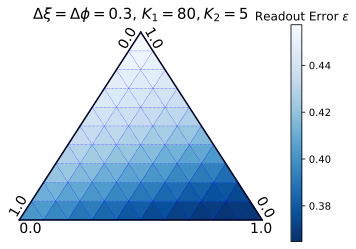

In [9]:
figure, tax = ternary.figure(scale=n)
tax.heatmap(Record_2,scale=n,cmap='Blues_r')
tax.boundary()

tax.gridlines(multiple = 1, color="blue")

plt.text(0,-0.6,'0.0',fontsize=14)
plt.text(9.5,-0.6,'1.0',fontsize=14)

plt.text(9.65,0.1,'0.0',rotation=-60,fontsize=14)
plt.text(5.05,7.9,'1.0',rotation = -60,fontsize=14)

plt.text(4.0,7.9,'0.0',rotation= 60,fontsize=14)
plt.text(-0.5,0.15,'1.0',rotation = 60,fontsize=14)


plt.text(9.7,9.2,r'Readout Error $\epsilon$',fontsize=12)

# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

tax.set_title(r'$\Delta \xi= \Delta \phi = 0.3$, $K_1 = 80, K_2 = 5$',y=1, fontsize=15)
plt.savefig('5B.png',transparent=True,dpi=200,bbox_inches='tight')
plt.show()

In [10]:
# Optimal point
from scipy.optimize import minimize

N = 100
M = 100
Nc = 1000
P = 80
K = 5
delta_sigma = 0.3
delta_eta = 0.3
f= 0.05
T = norm.ppf(1-f) 

e = 1e-10 # close to zero
cons = ({'type': 'eq', 'fun': lambda x: x[0] + x[1] + x[2] - 1}, # x+y+z=1
        {'type': 'ineq', 'fun': lambda x: x[0] - e}, # x>=e, s.t. x > 0
        {'type': 'ineq', 'fun': lambda x: x[1] - e},
        {'type': 'ineq', 'fun': lambda x: x[2] - e}
       )
p0 = np.array((0.4, 0.6, 0.0)) # initial value

sig_coeff = signal_coeff(f, T, delta_sigma, delta_eta)
C0, A, B, C = part3_coeff(Nc,N,M,P,K,f,T,delta_sigma,delta_eta)
D, E, F, R, S = part4_coeff(Nc,N,M,P,K,f,T,delta_sigma,delta_eta)

def minus_SNR_p(p):    
    p1, p2, p3 = p
    signal  = f**2 * (1-f)**2 * ( sig_coeff[0]*(p1**2) + sig_coeff[1]*(p2**2) + sig_coeff[2]*(p3**2) + 
                                sig_coeff[3]*p1*p2 + sig_coeff[4]*p1*p3 + sig_coeff[5]*p2*p3 
                                + sig_coeff[6]*p1 + sig_coeff[7]*p2 + sig_coeff[8]*p3 + 1)
    part3 = C0 + A*p1 + B*p2 + C*p3
    part4 = D*p1*p1 + E*p2*p2 + F*p3*p3 + 2*R*p1*p3 + 2*S*p2*p3
    return -signal/(part3+part4)
# Run the Optimization Procedue 
res = minimize(minus_SNR_p, p0, method='SLSQP', constraints=cons, tol=1e-10)

print("Optimal Point of Readout Error: {}".format(res.x.round(3)))

Optimal Point of Readout Error: [0.795 0.    0.205]


### Figure 5C, noise asymmetry

In [11]:
N = 100
M = 100
Nc = 1000
P = 20
K = 20
delta_sigma = 0.3
delta_eta = 0.8
f= 0.05

In [12]:
n = 10  # grid size
Record_3= dict()


for i,j,k in tqdm(simplex_iterator(n),total = comb(n+2,n)):
    
    p1 = i / float(n)
    p2 = j / float(n)
    p3 = k / float(n)
    
    Record_3[(i,j,k)] = Readerror_theory(Nc,N,M,P,K,p1,p2,p3,f,delta_sigma,delta_eta)[0]

100%|██████████| 66/66.0 [00:09<00:00,  6.81it/s]


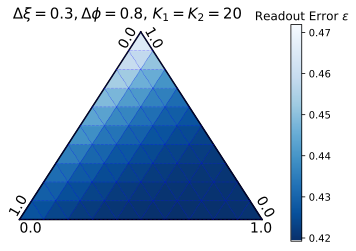

In [13]:
figure, tax = ternary.figure(scale=n)
tax.heatmap(Record_3,scale=n,cmap='Blues_r')
tax.boundary()
tax.gridlines(multiple = 1, color="blue")

plt.text(0,-0.6,'0.0',fontsize=14)
plt.text(9.5,-0.6,'1.0',fontsize=14)

plt.text(9.65,0.1,'0.0',rotation=-60,fontsize=14)
plt.text(5.05,7.9,'1.0',rotation = -60,fontsize=14)

plt.text(4.0,7.9,'0.0',rotation= 60,fontsize=14)
plt.text(-0.5,0.15,'1.0',rotation = 60,fontsize=14)


plt.text(9.7,9.2,r'Readout Error $\epsilon$',fontsize=12)

# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

tax.set_title(r'$\Delta \xi= 0.3, \Delta \phi = 0.8$, $K_1 =  K_2 = 20$',x=0.45,y=1, fontsize=15)
plt.savefig('5C.png',transparent=True,dpi=200,bbox_inches='tight')
plt.show()

In [14]:
# Optimal point
from scipy.optimize import minimize

N = 100
M = 100
Nc = 1000
P = 20
K = 20
delta_sigma = 0.3
delta_eta = 0.8
f= 0.05
T = norm.ppf(1-f) 

e = 1e-10 # close to zero
cons = ({'type': 'eq', 'fun': lambda x: x[0] + x[1] + x[2] - 1}, # x+y+z=1
        {'type': 'ineq', 'fun': lambda x: x[0] - e}, # x>=e, s.t. x > 0
        {'type': 'ineq', 'fun': lambda x: x[1] - e},
        {'type': 'ineq', 'fun': lambda x: x[2] - e}
       )
p0 = np.array((0.4, 0.6, 0.0)) # initial value

sig_coeff = signal_coeff(f, T, delta_sigma, delta_eta)
C0, A, B, C = part3_coeff(Nc,N,M,P,K,f,T,delta_sigma,delta_eta)
D, E, F, R, S = part4_coeff(Nc,N,M,P,K,f,T,delta_sigma,delta_eta)

def minus_SNR_p(p):    
    p1, p2, p3 = p
    signal  = f**2 * (1-f)**2 * ( sig_coeff[0]*(p1**2) + sig_coeff[1]*(p2**2) + sig_coeff[2]*(p3**2) + 
                                sig_coeff[3]*p1*p2 + sig_coeff[4]*p1*p3 + sig_coeff[5]*p2*p3 
                                + sig_coeff[6]*p1 + sig_coeff[7]*p2 + sig_coeff[8]*p3 + 1)
    part3 = C0 + A*p1 + B*p2 + C*p3
    part4 = D*p1*p1 + E*p2*p2 + F*p3*p3 + 2*R*p1*p3 + 2*S*p2*p3
    return -signal/(part3+part4)
# Run the Optimization Procedue 
res = minimize(minus_SNR_p, p0, method='SLSQP', constraints=cons, tol=1e-10)

print("Optimal Point of Readout Error: {}".format(res.x.round(3)))

Optimal Point of Readout Error: [0.61 0.   0.39]


### Figure 5D, Curves

In [15]:
N = 100
M = 100
Nc = 1000
f= 0.05

In [16]:
# Theory
delta_sigma = 0.3
delta_eta = 0.3
p2=0.

P = 20
K = 20
error_curve1=[]
for p1 in tqdm(np.linspace(0.,1.,50)):
    p3 = 1.- p1
    error_curve1.append(Readerror_theory(Nc,N,M,P,K,p1,p2,p3,f,delta_sigma,delta_eta)[0])

P = 31
K = 13
error_curve2=[]
for p1 in tqdm(np.linspace(0.,1.,50)):
    p3 = 1.- p1
    error_curve2.append(Readerror_theory(Nc,N,M,P,K,p1,p2,p3,f,delta_sigma,delta_eta)[0])

P = 40
K = 10
error_curve3=[]
for p1 in tqdm(np.linspace(0.,1.,50)):
    p3 = 1.- p1
    error_curve3.append(Readerror_theory(Nc,N,M,P,K,p1,p2,p3,f,delta_sigma,delta_eta)[0])

P = 80
K = 5
error_curve4=[]
for p1 in tqdm(np.linspace(0.,1.,50)):
    p3 = 1.- p1
    error_curve4.append(Readerror_theory(Nc,N,M,P,K,p1,p2,p3,f,delta_sigma,delta_eta)[0])

P = 56
K = 7
error_curve31=[]
for p1 in tqdm(np.linspace(0.,1.,50)):
    p3 = 1.- p1
    error_curve31.append(Readerror_theory(Nc,N,M,P,K,p1,p2,p3,f,delta_sigma,delta_eta)[0])

P = 67
K = 6 
error_curve32=[]
for p1 in tqdm(np.linspace(0.,1.,50)):
    p3 = 1.- p1
    error_curve32.append(Readerror_theory(Nc,N,M,P,K,p1,p2,p3,f,delta_sigma,delta_eta)[0])  

100%|██████████| 50/50 [00:05<00:00,  8.49it/s]


In [17]:
# Read in all the simulation results
# Simulations are done by simulation_DE.py on Harvard RC cluster with job manager
simu_curve1 = np.loadtxt(r'simu_curve1.txt',skiprows=1)
simu_curve2 = np.loadtxt(r'simu_curve2.txt',skiprows=1)
simu_curve3 = np.loadtxt(r'simu_curve3.txt',skiprows=1)
simu_curve31 = np.loadtxt(r'simu_curve31.txt',skiprows=1)
simu_curve32 = np.loadtxt(r'simu_curve32.txt',skiprows=1)
simu_curve4 = np.loadtxt(r'simu_curve4.txt',skiprows=1)

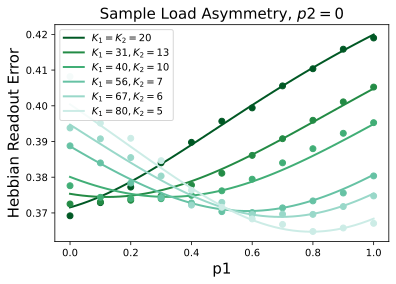

In [18]:
c1='#005824'
c2='#238b45'
c3='#41ae76'
c4='#66c2a4'
c5='#99d8c9'
c6='#ccece6'

plt.figure(figsize=[6,4])
plt.plot(np.linspace(0.,1.,50), error_curve1, label=r'$K_1=K_2=20$',lw=2,color=c1)
plt.plot(np.linspace(0.,1.,11), simu_curve1, 'o', color=c1)

plt.plot(np.linspace(0.,1.,50), error_curve2, label=r'$K_1=31, K_2=13$',lw=2, color=c2)
plt.plot(np.linspace(0.,1.,11), simu_curve2, 'o', color=c2)

plt.plot(np.linspace(0.,1.,50), error_curve3, label=r'$K_1=40, K_2=10$',lw=2, color=c3)
plt.plot(np.linspace(0.,1.,11), simu_curve3, 'o', color=c3)

plt.plot(np.linspace(0.,1.,50), error_curve31, label=r'$K_1=56, K_2=7$',lw=2, color=c4)
plt.plot(np.linspace(0.,1.,11), simu_curve31, 'o', color=c4)

plt.plot(np.linspace(0.,1.,50), error_curve32, label=r'$K_1=67, K_2=6$',lw=2, color=c5)
plt.plot(np.linspace(0.,1.,11), simu_curve32, 'o', color=c5)

plt.plot(np.linspace(0.,1.,50), error_curve4, label=r'$K_1=80, K_2=5$',lw=2, color=c6)
plt.plot(np.linspace(0.,1.,11), simu_curve4, 'o', color=c6)

plt.xlabel('p1',fontsize=15)
plt.ylabel('Hebbian Readout Error', fontsize=15)
plt.legend()
plt.title(r'Sample Load Asymmetry, $p2=0$',fontsize=15)
plt.savefig('5D.png',transparent=True,dpi=200,bbox_inches='tight')
plt.show()

### Figure 5E, curves

In [19]:
N = 100
M = 100
Nc = 1000
f= 0.05

In [20]:
P=20
K=20
p2=0. 

delta_sigma = 0.3
delta_eta = 0.3
error_curve1=[]
for p1 in tqdm(np.linspace(0.,1.,50)):
    p3 = 1.- p1
    error_curve1.append(Readerror_theory(Nc,N,M,P,K,p1,p2,p3,f,delta_sigma,delta_eta)[0])
    
delta_sigma = 0.3
delta_eta = 0.4
error_curve5=[]
for p1 in tqdm(np.linspace(0.,1.,50)):
    p3 = 1.- p1
    error_curve5.append(Readerror_theory(Nc,N,M,P,K,p1,p2,p3,f,delta_sigma,delta_eta)[0])
    
delta_sigma = 0.3
delta_eta = 0.5
error_curve6=[]
for p1 in tqdm(np.linspace(0.,1.,50)):
    p3 = 1.- p1
    error_curve6.append(Readerror_theory(Nc,N,M,P,K,p1,p2,p3,f,delta_sigma,delta_eta)[0])

delta_sigma = 0.3
delta_eta = 0.6
error_curve7=[]
for p1 in tqdm(np.linspace(0.,1.,50)):
    p3 = 1.- p1
    error_curve7.append(Readerror_theory(Nc,N,M,P,K,p1,p2,p3,f,delta_sigma,delta_eta)[0])
    
delta_sigma = 0.3
delta_eta = 0.7
error_curve8=[]
for p1 in tqdm(np.linspace(0.,1.,50)):
    p3 = 1.- p1
    error_curve8.append(Readerror_theory(Nc,N,M,P,K,p1,p2,p3,f,delta_sigma,delta_eta)[0])

delta_sigma = 0.3
delta_eta = 0.8
error_curve9=[]
for p1 in tqdm(np.linspace(0.,1.,50)):
    p3 = 1.- p1
    error_curve9.append(Readerror_theory(Nc,N,M,P,K,p1,p2,p3,f,delta_sigma,delta_eta)[0])

100%|██████████| 50/50 [00:05<00:00,  8.64it/s]


In [21]:
# Read in all the simulation results
# Simulations are done by simulation_DE.py on Harvard RC cluster with job manager
simu_curve9 = np.loadtxt(r'simu_curve9.txt',skiprows=1)
simu_curve8 = np.loadtxt(r'simu_curve8.txt',skiprows=1)
simu_curve7 = np.loadtxt(r'simu_curve7.txt',skiprows=1)
simu_curve6 = np.loadtxt(r'simu_curve6.txt',skiprows=1)
simu_curve5= np.loadtxt(r'simu_curve5.txt',skiprows=1)

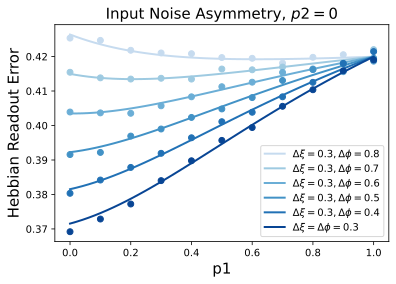

In [22]:
c1='#084594'
c2='#2171b5'
c3='#4292c6'
c4='#6baed6'
c5='#9ecae1'
c6='#c6dbef'

plt.figure(figsize=[6,4])
plt.plot(np.linspace(0.,1.,50), error_curve9, label=r'$\Delta \xi =0.3, \Delta \phi = 0.8$',lw=2, color=c6)
plt.plot(np.linspace(0.,1.,11), simu_curve9, 'o', color=c6)

plt.plot(np.linspace(0.,1.,50), error_curve8, label=r'$\Delta \xi =0.3, \Delta \phi = 0.7$',lw=2, color=c5)
plt.plot(np.linspace(0.,1.,11), simu_curve8, 'o', color=c5)

plt.plot(np.linspace(0.,1.,50), error_curve7, label=r'$\Delta \xi =0.3, \Delta \phi = 0.6$',lw=2, color=c4)
plt.plot(np.linspace(0.,1.,11), simu_curve7, 'o', color=c4)

plt.plot(np.linspace(0.,1.,50), error_curve6, label=r'$\Delta \xi =0.3, \Delta \phi = 0.5$',lw=2, color=c3)
plt.plot(np.linspace(0.,1.,11), simu_curve6, 'o', color=c3)

plt.plot(np.linspace(0.,1.,50), error_curve5, label=r'$\Delta \xi =0.3, \Delta \phi = 0.4$',lw=2, color=c2)
plt.plot(np.linspace(0.,1.,11), simu_curve5, 'o', color=c2)

plt.plot(np.linspace(0.,1.,50), error_curve1, label=r'$\Delta \xi =\Delta \phi = 0.3$',lw=2,color=c1)
plt.plot(np.linspace(0.,1.,11), simu_curve1, 'o', color=c1)

plt.xlabel('p1',fontsize=15)
plt.ylabel('Hebbian Readout Error', fontsize=15)
plt.legend()
plt.title(r'Input Noise Asymmetry, $p2=0$',fontsize=15)
plt.savefig('5E.png',transparent=True,dpi=200,bbox_inches='tight')
plt.show()

### Figure 5F

In [23]:
N = 100
M = 100
Nc = 1000
P = 20
K = 20
delta_sigma = 0.3
delta_eta = 0.3
f= 0.05

n = 10  # grid size
Record_5f= dict()


for i,j,k in tqdm(simplex_iterator(n),total = comb(n+2,n)):
    
    p1 = i / float(n)
    p2 = j / float(n)
    p3 = k / float(n)
    
    Record_5f[(i,j,k)] = Dimension_theory(Nc,N,M,P,K,p1,p2,p3,f)

100%|██████████| 66/66.0 [00:12<00:00,  5.26it/s]


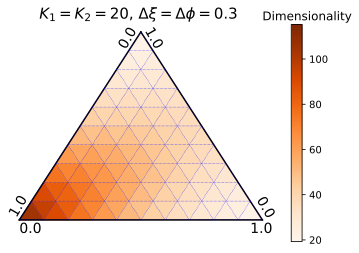

In [25]:
figure, tax = ternary.figure(scale=n)
tax.heatmap(Record_5f,scale=n,cmap='Oranges')
tax.boundary()

tax.gridlines(multiple = 1, color="blue")

plt.text(0,-0.6,'0.0',fontsize=14)
plt.text(9.5,-0.6,'1.0',fontsize=14)

plt.text(9.65,0.1,'0.0',rotation=-60,fontsize=14)
plt.text(5.05,7.9,'1.0',rotation = -60,fontsize=14)

plt.text(4.0,7.9,'0.0',rotation= 60,fontsize=14)
plt.text(-0.5,0.15,'1.0',rotation = 60,fontsize=14)


plt.text(10,9.2,r'Dimensionality',fontsize=12)

# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

tax.set_title(r'$K_1 = K_2 = 20$, $\Delta \xi = \Delta \phi = 0.3$ ',y=1, fontsize=15)
plt.savefig('5F.png',transparent=True,dpi=400,bbox_inches='tight')
plt.show()

In [26]:
# Optimal Point
N = 100
M = 100
Nc = 1000
P = 20
K = 20
f= 0.05
T = norm.ppf(1-f) 
delta_sigma = 1e-6
delta_eta = 1e-6

e = 1e-10 # close to zero
cons = ({'type': 'eq', 'fun': lambda x: x[0] + x[1] + x[2] - 1}, # x+y+z=1
        {'type': 'ineq', 'fun': lambda x: x[0] - e}, # x>=e, s.t. x > 0
        {'type': 'ineq', 'fun': lambda x: x[1] - e},
        {'type': 'ineq', 'fun': lambda x: x[2] - e}
       )
p0 = np.array((0.2, 0.0, 0.8)) # initial value

C0, A, B, C = part3_coeff(Nc,N,M,P,K,f,T,delta_sigma,delta_eta)
D, E, F, R, S = part4_coeff(Nc,N,M,P,K,f,T,delta_sigma,delta_eta)

def reci_DIM_p(p):    
    p1, p2, p3 = p
    part3 = C0 + A*p1 + B*p2 + C*p3
    part4 = D*p1*p1 + E*p2*p2 + F*p3*p3 + 2*R*p1*p3 + 2*S*p2*p3
    return part3+part4

# Run the Optimization Procedue 
res = minimize(reci_DIM_p, p0, method='SLSQP', constraints=cons, tol=1e-6)
print("Optimal Point of Dimensionality: {}".format(res.x.round(3)))

Optimal Point of Dimensionality: [0. 0. 1.]


### Figure 5G

In [27]:
N = 100
M = 100
Nc = 1000
P = 80
K = 5
delta_sigma = 0.3
delta_eta = 0.3
f= 0.05

n = 10  # grid size
Record_5g= dict()


for i,j,k in tqdm(simplex_iterator(n),total = comb(n+2,n)):
    
    p1 = i / float(n)
    p2 = j / float(n)
    p3 = k / float(n)
    
    Record_5g[(i,j,k)] = Dimension_theory(Nc,N,M,P,K,p1,p2,p3,f)

100%|██████████| 66/66.0 [00:12<00:00,  5.34it/s]


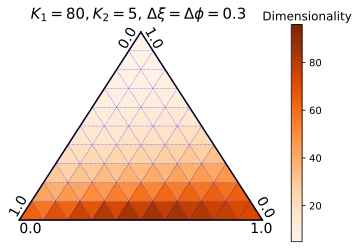

In [29]:
figure, tax = ternary.figure(scale=n)
tax.heatmap(Record_5g,scale=n,cmap='Oranges')
tax.boundary()
tax.gridlines(multiple = 1, color="blue")

plt.text(0,-0.6,'0.0',fontsize=14)
plt.text(9.5,-0.6,'1.0',fontsize=14)

plt.text(9.65,0.1,'0.0',rotation=-60,fontsize=14)
plt.text(5.05,7.9,'1.0',rotation = -60,fontsize=14)

plt.text(4.0,7.9,'0.0',rotation= 60,fontsize=14)
plt.text(-0.5,0.15,'1.0',rotation = 60,fontsize=14)


plt.text(10,9.2,r'Dimensionality',fontsize=12)

# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

tax.set_title(r'$K_1 = 80, K_2 = 5$, $\Delta \xi = \Delta \phi = 0.3$ ',y=1, fontsize=15)
plt.savefig('5G.png',transparent=True,dpi=400,bbox_inches='tight')
plt.show()

In [33]:
# Optimal Point
N = 100
M = 100
Nc = 1000
P = 80
K = 5
f= 0.05
T = norm.ppf(1-f) 
delta_sigma = 1e-6
delta_eta = 1e-6

e = 1e-10 # close to zero
cons = ({'type': 'eq', 'fun': lambda x: x[0] + x[1] + x[2] - 1}, # x+y+z=1
        {'type': 'ineq', 'fun': lambda x: x[0] - e}, # x>=e, s.t. x > 0
        {'type': 'ineq', 'fun': lambda x: x[1] - e},
        {'type': 'ineq', 'fun': lambda x: x[2] - e}
       )
p0 = np.array((0.2, 0.0, 0.8)) # initial value

C0, A, B, C = part3_coeff(Nc,N,M,P,K,f,T,delta_sigma,delta_eta)
D, E, F, R, S = part4_coeff(Nc,N,M,P,K,f,T,delta_sigma,delta_eta)

def reci_DIM_p(p):    
    p1, p2, p3 = p
    part3 = C0 + A*p1 + B*p2 + C*p3
    part4 = D*p1*p1 + E*p2*p2 + F*p3*p3 + 2*R*p1*p3 + 2*S*p2*p3
    return part3+part4

# Run the Optimization Procedue 
res = minimize(reci_DIM_p, p0, method='SLSQP', constraints=cons, tol=1e-10)
print("Optimal Point of Dimensionality: {}".format(res.x.round(3)))

Optimal Point of Dimensionality: [0.509 0.    0.491]


### Figure 5H

In [34]:
N = 100
M = 100
Nc = 2100
P = 20
K = 20
f= 0.05
delta_sigma = 0.3
delta_eta = 0.8

n = 10  # grid size
Record_5h= dict()

for i,j,k in tqdm(simplex_iterator(n),total = comb(n+2,n)):
    
    p1 = i / float(n)
    p2 = j / float(n)
    p3 = k / float(n)
    
    Record_5h[(i,j,k)] = Dimension_theory(Nc,N,M,P,K,p1,p2,p3,f)

100%|██████████| 66/66.0 [00:12<00:00,  5.36it/s]


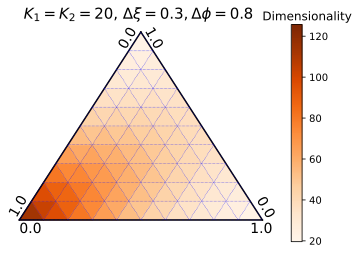

In [35]:
figure, tax = ternary.figure(scale=n)
tax.heatmap(Record_5h,scale=n,cmap='Oranges')
tax.boundary()
tax.gridlines(multiple = 1, color="blue")

plt.text(0,-0.6,'0.0',fontsize=14)
plt.text(9.5,-0.6,'1.0',fontsize=14)

plt.text(9.65,0.1,'0.0',rotation=-60,fontsize=14)
plt.text(5.05,7.9,'1.0',rotation = -60,fontsize=14)

plt.text(4.0,7.9,'0.0',rotation= 60,fontsize=14)
plt.text(-0.5,0.15,'1.0',rotation = 60,fontsize=14)


plt.text(10,9.2,r'Dimensionality',fontsize=12)

# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()
tax.get_axes().axis('off')

tax.set_title(r'$K_1 = K_2 = 20$, $\Delta \xi = 0.3, \Delta \phi = 0.8$ ',y=1, fontsize=15)
plt.savefig('5H.png',transparent=True,dpi=400,bbox_inches='tight')
plt.show()

In [36]:
# Optimal Point
N = 100
M = 100
Nc = 1000
P = 20
K = 20
f= 0.05
T = norm.ppf(1-f) 
delta_sigma = 1e-6
delta_eta = 1e-6

e = 1e-10 # close to zero
cons = ({'type': 'eq', 'fun': lambda x: x[0] + x[1] + x[2] - 1}, # x+y+z=1
        {'type': 'ineq', 'fun': lambda x: x[0] - e}, # x>=e, s.t. x > 0
        {'type': 'ineq', 'fun': lambda x: x[1] - e},
        {'type': 'ineq', 'fun': lambda x: x[2] - e}
       )
p0 = np.array((0.2, 0.0, 0.8)) # initial value

C0, A, B, C = part3_coeff(Nc,N,M,P,K,f,T,delta_sigma,delta_eta)
D, E, F, R, S = part4_coeff(Nc,N,M,P,K,f,T,delta_sigma,delta_eta)

# Run the Optimization Procedue 
res = minimize(reci_DIM_p, p0, method='SLSQP', constraints=cons, tol=1e-6)
print("Optimal Point of Dimensionality: {}".format(res.x.round(3)))

Optimal Point of Dimensionality: [0. 0. 1.]
